# QUALTRICS VISUALISATIONS

##### intro:
importeren van libraries
dataframe inlezen gebasseerd op excel dataset. 

In [27]:
## import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns 
from ipywidgets import widgets
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set();
## making the notebook magical 
%lsmagic
%matplotlib inline

In [2]:
## Dataset inlezen 
df = pd.read_excel('D:/Users/beheerder/Documents/Floor/UGent/2018-2019/stage/data/qualtrics/qualtricsoriginal.xlsx')

DOEL:
het is de bedoeling om alle verschillende info uit de vragenlijsten even te visualiseren + eventuele verbanden waarop plots wordt gedacht. 
(1) geslacht
(2) leeftijd
(3) geslacht + leeftijd
(4) IQ
(5) Gemiddelde geschatte (!) gebruik tijdens week/weekend (in minuten)
(6) Gerapporteerde piekgebruik (mochten meerdere momenten aanduiden)
(7) Gerapporteerde appgebruik (mochten meerdere apps aanduiden)
(8) Gerapporteerde smartphonegebruik in bepaalde situaties: auto, tijdens eten, tijdens school (Dagen/week: min = 0 - max = 7)
(9) laatste smartphonegebruik VOOR slaap, eerste smartphonegebruik NA slaap
(10) gerapporteerde Bedtijd & Wektijd
(11) MT preference vragenlijst: samengetelde MT score, maar ook heatmap van meestvoorkomende reactie per vraag (1 = helemaal niet van toepassing, 7 = helemaal van toepassing). 
(12) TOT_SLAAP = welke aantal minuten geeft een participant aan dat het duurt tot hij/zij slaapt? Gelinkt aan geschatte gebruik van smartphone voor slaap? 
(13) Slaapkwaliteit vragenlijst + regressieplots + heatmap van meestvoorkomende reactie per vraag 

## GESLACHT

In [4]:
geslacht = df[["ppn", "Geslacht"]]
geslacht 

,ppn,Geslacht
0,1,V
1,2,M
2,3,M
3,4,M
4,5,M
5,6,V
6,8,V
7,9,V
8,10,M
9,11,V


(0.0, 1.0)

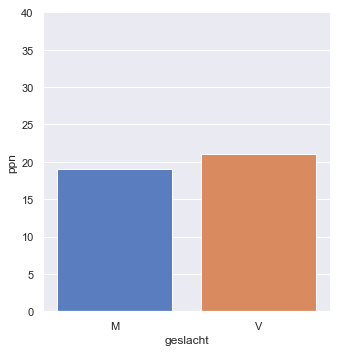

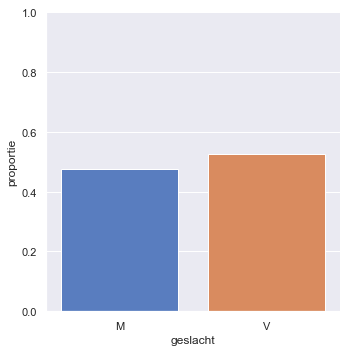

In [3]:
#hoeveel participanten zijn er van elk geslacht? Mooie verdeling? 
geslacht_count = geslacht.groupby(["Geslacht"]).count()
geslacht_count["geslacht"] = ["M", "V"] 
geslacht_count["proportie"] = geslacht_count["ppn"]/40

#dit nu visualiseren
## aantal participanten per geslacht
Gender = sns.catplot(x = "geslacht", y= "ppn", data=geslacht_count, kind="bar", palette="muted", legend=True)
Gender.ax.set_ylim(0, 40)

## proportie participanten per geslacht
Gender_prop = sns.catplot(x = "geslacht", y= "proportie", data=geslacht_count, kind="bar", palette="muted", legend=True)
Gender_prop.ax.set_ylim(0.0, 1.0)

## LEEFTIJD

(0.0, 1.0)

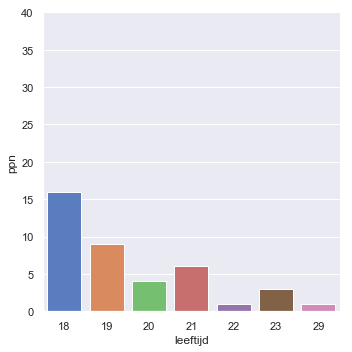

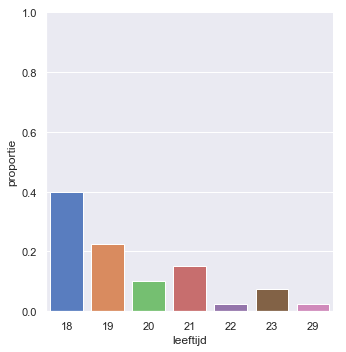

In [39]:
## LEEFTIJD
leeftijd = df[["ppn", "leeftijd"]]
#hoeveel participanten zijn er van elke leeftijd? Mooie verdeling? 
leeftijd_count = leeftijd.groupby(["leeftijd"]).count()
leeftijd_count["leeftijd"] = ["18", "19", "20", "21","22", "23","29"] 
leeftijd_count["proportie"] = leeftijd_count["ppn"]/40

#dit nu visualiseren
## aantal participanten per leeftijd
leeftijd = sns.catplot(x = "leeftijd", y= "ppn", data=leeftijd_count, kind="bar", palette="muted", legend=True)
leeftijd.ax.set_ylim(0, 40)

## proportie participanten per leeftijd
leeftijd_prop = sns.catplot(x = "leeftijd", y= "proportie", data=leeftijd_count, kind="bar", palette="muted", legend=True)
leeftijd_prop.ax.set_ylim(0.0, 1.0)

## GESLACHT + LEEFTIJD

(0.0, 1.0)

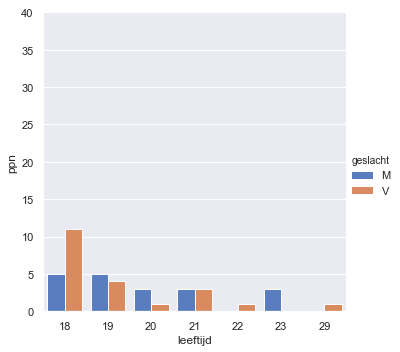

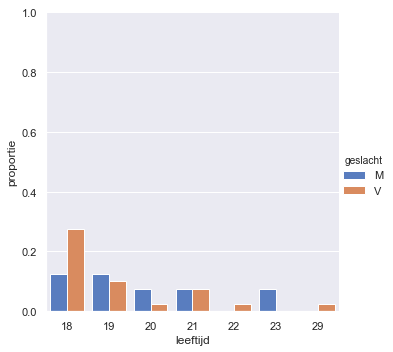

In [5]:
## LEEFTIJD + GESLACHT
combo = df[["ppn", "Geslacht",  "leeftijd"]]
#hoeveel participanten zijn er van elke leeftijd? Mooie verdeling? 
combo_count = combo.groupby(["leeftijd", "Geslacht"]).count()

combo_count["leeftijd"] = ["18","18", "19","19", "20","20", "21","21","22","23","29"] 
combo_count["geslacht"] = ["M", "V","M", "V","M", "V","M", "V","V","M", "V"]
combo_count["proportie"] = combo_count["ppn"]/40

#dit nu visualiseren
## aantal participanten per leeftijd
combo_aantal = sns.catplot(x = "leeftijd", y= "ppn", hue = "geslacht", data=combo_count, kind="bar", palette="muted", legend=True)
combo_aantal.ax.set_ylim(0, 40)

## proportie participanten per leeftijd
combo_prop = sns.catplot(x = "leeftijd", y= "proportie", hue = "geslacht", data=combo_count, kind="bar", palette="muted", legend=True)
combo_prop.ax.set_ylim(0.0, 1.0)

## IQ

(0.0, 1.0)

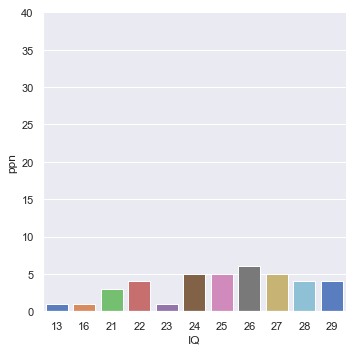

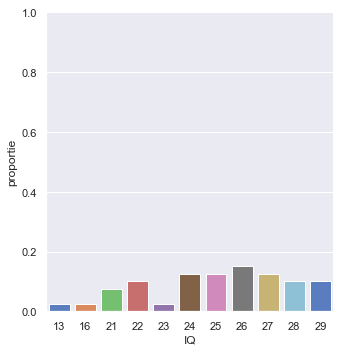

In [6]:
#####IQ-combo's
IQ = df[["ppn", "Geslacht",  "leeftijd", "IQ"]]
#hoeveel participanten zijn er van elke leeftijd? Mooie verdeling? 

###IQ
IQ_count = IQ.groupby(["IQ"]).count()
IQ_count = IQ_count[["ppn"]]
IQ_count["IQ"] = ["13", "16", "21", "22", "23", "24", "25", "26", "27", "28", "29"]
IQ_count["proportie"] = IQ_count["ppn"]/40

#dit nu visualiseren
## aantal participanten per IQ
IQ_aantal = sns.catplot(x = "IQ", y= "ppn",  data=IQ_count, kind="bar", palette="muted", legend=True)
IQ_aantal.ax.set_ylim(0, 40)

## proportie participanten per IQ
IQ_prop = sns.catplot(x = "IQ", y= "proportie",  data=IQ_count, kind="bar", palette="muted", legend=True)
IQ_prop.ax.set_ylim(0.0, 1.0)

## Gemiddelde geschatte (!) gebruik tijdens week/weekend
in minuten

In [7]:
#specifieke dataset maken 
gebruik = df[['ppn', 'G_WEEK', 'G_WEEKEND']]

In [10]:
gebruik.describe()

,ppn,G_WEEK,G_WEEKEND
count,40.000000,40.000000,40.000000
mean,21.800000,232.700000,254.075000
std,12.512968,96.082283,126.601006
min,1.000000,90.000000,60.000000
25%,11.750000,180.000000,180.000000
50%,21.500000,210.000000,232.500000
75%,32.250000,300.000000,300.000000
max,43.000000,610.000000,735.000000


#### to long format 
###### (1) kolom "ppn", (2) kolom "minutesàday", (3) kolom "moment" 

In [8]:
gebruik_long = pd.melt(gebruik, id_vars="ppn", value_vars =['G_WEEK','G_WEEKEND'])
gebruik_long.columns = ["ppn", "moment", "minutesàday"]

#### visualiseren: lineplot
gebruik per participant - moment (week/weekend)

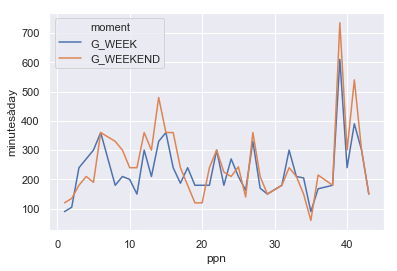

In [9]:
sns.lineplot(x="ppn", y="minutesàday", hue="moment", data=gebruik_long)

#### visualiseren: heatmap 
Gebruik per moment (x) - per participant (y): heat = "minutesàday"

(array([ 0.5,  3.5,  6.5,  9.5, 12.5, 15.5, 18.5, 21.5, 24.5, 27.5, 30.5,
        33.5, 36.5, 39.5]), <a list of 14 Text yticklabel objects>)

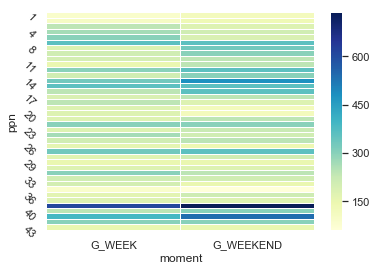

In [73]:
heat_gebruik = gebruik_long.pivot("ppn","moment", "minutesàday")
sns.heatmap(heat_gebruik, cmap="YlGnBu", linewidths= 0.01)
plt.yticks(rotation =-45)
#opmerking: 
##misschien hier de rijen breder maken (hoe?), waardoor de labels ook kunnen vóór ELKE rij. 

Het bovenstaande lineplot kan je nu ook vergelijken met de pieken in bovenstaande heatmap. 

BESLUIT:
Deze zelfrapportage kan dan vergeleken worden met de heat map van het werkelijke gebruik in minuten per dag (week/weekend) per participant.

### Ook mogelijk om over alle participanten heen te bekijken. 

#### lineplot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


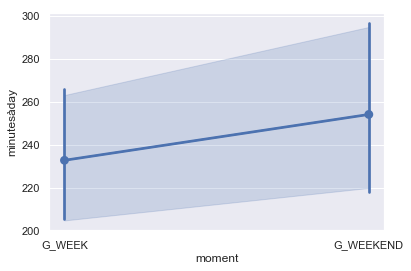

In [76]:
sns.pointplot(x="moment", y="minutesàday", data=gebruik_long)
sns.lineplot(x="moment", y="minutesàday", data=gebruik_long)

#### swarmplot

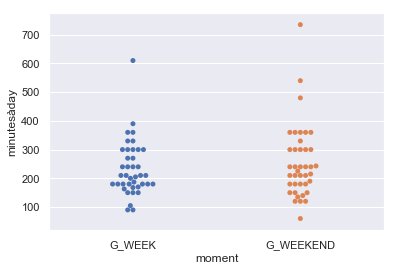

In [6]:
sns.swarmplot(x="moment", y="minutesàday", data=gebruik_long)

In [7]:
gebruik_long.head(5)

,ppn,moment,minutesàday
0,1,G_WEEK,90
1,2,G_WEEK,105
2,3,G_WEEK,240
3,4,G_WEEK,270
4,5,G_WEEK,300


#### factorplot

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


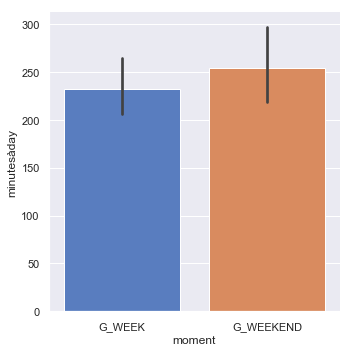

In [78]:
sns.catplot( "moment", "minutesàday", data=gebruik_long, kind="bar", palette="muted", legend=False)

#### Boxenplot

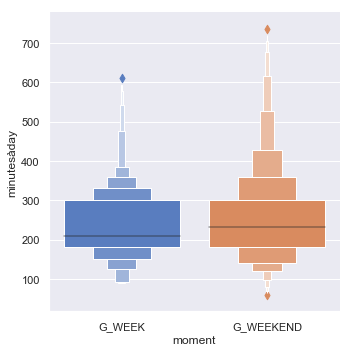

In [79]:
sns.catplot( "moment", "minutesàday", data=gebruik_long, kind="boxen", palette="muted", legend=False)

## Gerapporteerde piekgebruik
mochten meerdere momenten aanduiden

In [11]:
#specifieke dataset maken 
piek = df[['ppn', '5U-9U', '9U-12U', '12U-13U', '13U-18U', '18U-23U', '23U-5U']]

#### in long format
(1) ppn, (2) "moment" = moment vd dag, (3) "indicatie" = rapporteert frequent gebruik (0 of 1).  

In [12]:
piek_long = pd.melt(piek, id_vars="ppn", value_vars=['5U-9U', '9U-12U', '12U-13U', '13U-18U', '18U-23U', '23U-5U'])
piek_long.columns = ["ppn", "moment", "indicatie"]
piek_long_m = piek_long.groupby("moment")["indicatie"].sum() 
piek_long_m = piek_long_m.to_frame()
piek_long_m.columns = ["aantal"]
piek_long_m["proportie"] = piek_long_m["aantal"]/40
piek_long_m["moment"]= ['12U-13U', '13U-18U', '18U-23U', '23U-5U','5U-9U', '9U-12U']

#### plotten gemiddeld piekgebruik (aantal/proportie)

##### lineplot (aantal/proportie)

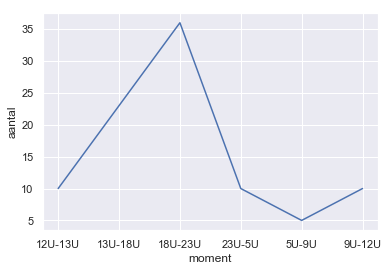

In [13]:
sns.lineplot(x="moment", y="aantal", data=piek_long_m)


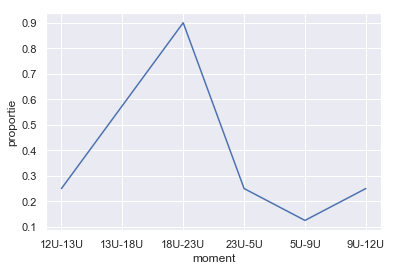

In [14]:
sns.lineplot(x="moment", y="proportie", data=piek_long_m)

##### factorplot(bar) (aantal/proportie)

(0, 40)

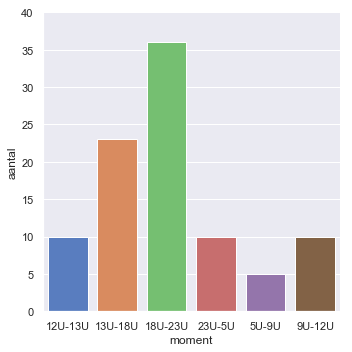

In [119]:
cat_aantal = sns.catplot( "moment", "aantal", data=piek_long_m, kind="bar", palette="muted", legend=False)
cat_aantal.ax.set_ylim(0,40)

(0.0, 1.0)

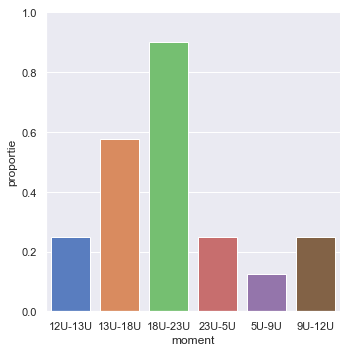

In [16]:
cat_prop = sns.catplot( "moment", "proportie", data=piek_long_m, kind="bar", palette="muted", legend=False)
cat_prop.ax.set_ylim(0.0, 1.0)

Dit piek gebruik kan nu vergeleken worden met het gebruik zoals het uit de MobileDNA data komt. 

## Gerapporteerde appgebruik
mochten meerdere apps aanduiden

In [17]:
#specifieke dataset maken 
APP = df[['ppn', 'INTERNET/ZOEK', 'MESSENGERS', 'SNS', 'ENTERTAIN', 'GAMES', 'ANDERE'  ]]

#### long format 

In [18]:
APP_long = pd.melt(APP, id_vars="ppn", value_vars=['INTERNET/ZOEK', 'MESSENGERS', 'SNS', 'ENTERTAIN', 'GAMES', 'ANDERE'])
APP_long.columns = ["ppn", "applicatie", "indicatie"]
APP_long_m = APP_long.groupby("applicatie")["indicatie"].sum() 
APP_long_m = APP_long_m.to_frame()
APP_long_m.columns = ["aantal"]
APP_long_m["proportie"] = APP_long_m["aantal"]/40
APP_long_m["applicatie"]= ['ANDERE', 'ENTERTAIN','GAMES','INTERNET/ZOEK', 'MESSENGERS', 'SNS']
APP_long_m = APP_long_m.reindex(['SNS', 'MESSENGERS', 'INTERNET/ZOEK', 'GAMES', 'ENTERTAIN', 'ANDERE'])

#### visualisatie: absolute # mensen die voor die een bepaalde categorie hebben aangeduid als "vaak gebruikt". 

##### line-pointplot

(0, 40)

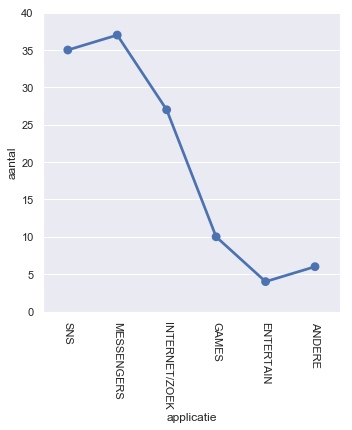

In [121]:

lin_aantal = sns.catplot(x="applicatie", y="aantal", kind = "point", data=APP_long_m, markers='o')
plt.xticks(rotation=-90)
lin_aantal.ax.set_ylim(0,40)

##### factorplot(bar)

(0, 40)

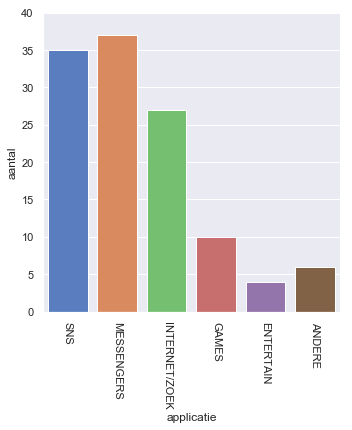

In [122]:
bar_aantal= sns.catplot( "applicatie", "aantal", data=APP_long_m, kind="bar", palette="muted", legend=False)
plt.xticks(rotation=-90)
bar_aantal.ax.set_ylim(0,40)

#### Proportioneel aantal mensen die applicatie aangeven als vaak gebruikt

Dankzij proportie makkelijker vergelijkbaar met de MobileDNA data die kijkt naar hoe vaak een bepaalde applicatie wordt gebruikt. 

##### line-pointplot

(0.0, 1.0)

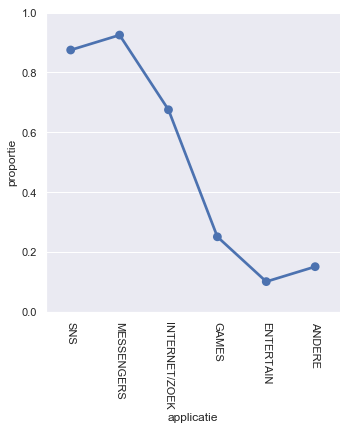

In [123]:
line_prop = sns.catplot(x="applicatie", y="proportie", kind="point", data=APP_long_m, markers='o')
plt.xticks(rotation=-90)
line_prop.ax.set_ylim(0.0, 1.0)

##### factorplot(bar)

(0.0, 1.0)

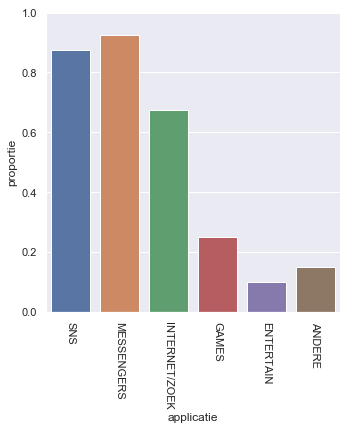

In [124]:
bar_prop = sns.catplot(x="applicatie", y="proportie", kind="bar", data=APP_long_m)
plt.xticks(rotation=-90)
bar_prop.ax.set_ylim(0.0, 1.0)

Probleem: categorieën van applicaties (zelfrapportage) is niet gelijk aan de categorieën van applicaties van MobileDNA

oplossing: zelf de categorieën van MobileDNA gaan indelen volgens de categorieën van de zelfrapportage

## Gerapporteerde smartphonegebruik in bepaalde situaties: 
auto, tijdens eten, tijdens school 
Dagen/week: min = 0 - max = 7

In [19]:
#specifieke dataframe aanmaken 
D_W = df[['ppn', 'D/W_AUTO', 'D/W_ETEN', 'D/W_SCHOOL']]

#### long format:

###### D/W_AUTO, D/W_ETEN & D/W_SCHOOL onder elkaar
(1) kolom ppn, (2) kolom "type", (3) kolom "D/W" = dagen/week; min = 0 - max = 7

In [20]:
D_W_long = pd.melt(D_W, id_vars = "ppn", value_vars=["D/W_AUTO", "D/W_ETEN", "D/W_SCHOOL"])
D_W_long.columns = ["ppn", "type", "D/W"]

D_W_count_long = D_W_long.groupby(["type", "D/W"]).count()
D_W_count_long["type"] = ["D/W_AUTO","D/W_AUTO", "D/W_AUTO", "D/W_AUTO", "D/W_AUTO", "D/W_AUTO", "D/W_AUTO", 
                          "D/W_ETEN","D/W_ETEN","D/W_ETEN","D/W_ETEN","D/W_ETEN","D/W_ETEN","D/W_ETEN","D/W_ETEN",
                          "D/W_SCHOOL","D/W_SCHOOL","D/W_SCHOOL","D/W_SCHOOL","D/W_SCHOOL","D/W_SCHOOL","D/W_SCHOOL"]
D_W_count_long["D/W"] = ["0","1","2","3","4","5","7",
                          "0","1","2","3","4","5","6","7",
                          "0","1","2","3","4","5","7",]
D_W_count_long.columns = ["aantal", "D/W", "type"]
D_W_count_long.to_excel("D_W_count_long.xlsx")

In [112]:
#ontbrekende waarde toevoegen
D_W_count_long_adjust = pd.read_excel('C:/Users/beheerder/D_W_count_long.xlsx')
D_W_count_long_adjust = D_W_count_long_adjust[["D/W", "type", "aantal"]]
D_W_count_long_adjust["proportie"] = D_W_count_long_adjust["aantal"]/40

#### visualiseren

##### line-pointplot (aantal & proportie)

(-2, 40)

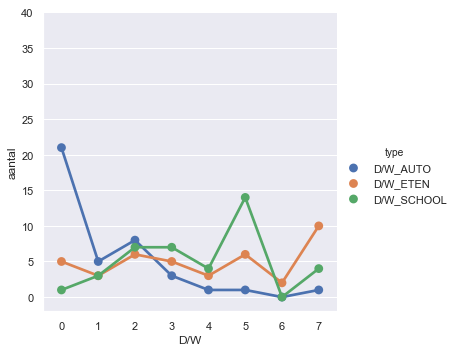

In [136]:
point_aantal = sns.catplot(x="D/W", y="aantal", hue="type", kind = "point", data=D_W_count_long_adjust, markers='o')
point_aantal.ax.set_ylim(-2,40)

(-0.05, 1.0)

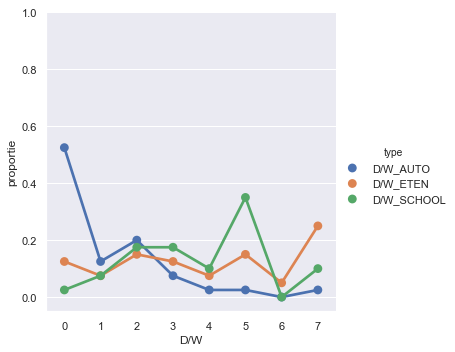

In [134]:
point_prop = sns.catplot(x="D/W", y="proportie", hue="type",kind = "point", data=D_W_count_long_adjust, markers='o')
point_prop.ax.set_ylim(-.05,1.0)

##### factorplot(bar) (aantal & proportie)

(0, 40)

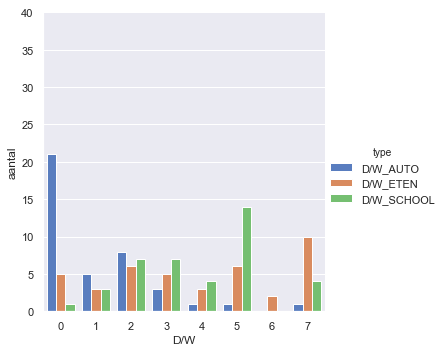

In [138]:
bar_aantal = sns.catplot( x="D/W", y="aantal", hue="type", data=D_W_count_long_adjust, kind="bar", palette="muted", legend=True)
bar_aantal.ax.set_ylim(0, 40)


AttributeError: You must use the `.axes` attribute (an array) when there is more than one plot.

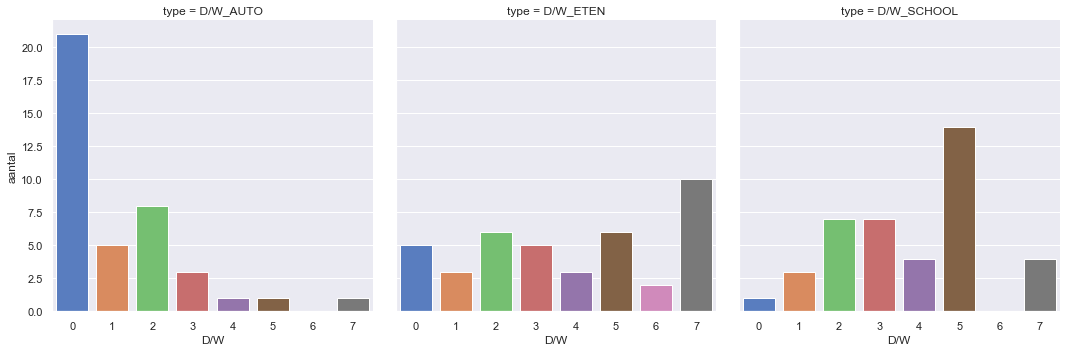

In [139]:
bar_aantal = sns.catplot( x="D/W", y="aantal", col="type", data=D_W_count_long_adjust, kind="bar", palette="muted", legend=True)
bar_aantal.ax.set_ylim(0, 40)

(0.0, 1.0)

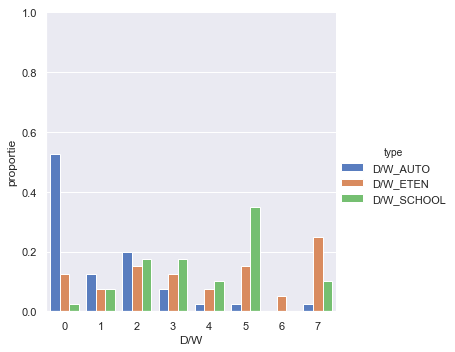

In [140]:
bar_proportie = sns.catplot( x="D/W", y="proportie", hue="type", data=D_W_count_long_adjust, kind="bar", palette="muted", legend=True)
bar_proportie.ax.set_ylim(0.0, 1.0)

AttributeError: You must use the `.axes` attribute (an array) when there is more than one plot.

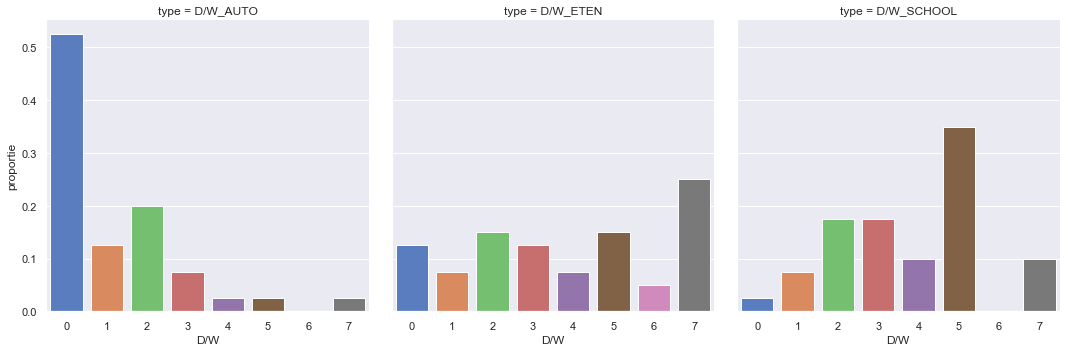

In [141]:
bar_proportie = sns.catplot( x="D/W", y="proportie", col="type", data=D_W_count_long_adjust, kind="bar", palette="muted", legend=True)
bar_proportie.ax.set_ylim(0.0, 1.0)

#### heatmap
x = type (D/W_AUTO, D/W_ETEN of D/W_SCHOOL) = 3 kolommen 

y = D/W (min: 0 -  max: 7)

heat = proportie vd mensen aangeduid. 

##### pivoteren van D_W_count_long_adjust ("D/W", "type", "proportie")

In [148]:
heat_D_W  = D_W_count_long_adjust.pivot("D/W", "type", "proportie")

##### visualiseren

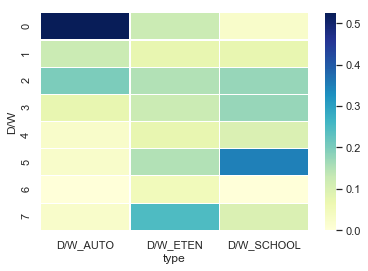

In [150]:
sns.heatmap(heat_D_W,cmap="YlGnBu", linewidths=.1)

<b> Conclusie: </b>
<ul>
    <li> (1) De meeste participanten (prop = +-0.5) geven aan dat ze <b> geen dagen van de week </b> hun smartphone gebruiken tijdens fietsen of autorijden = sociale wenselijkheid ? </li>
    <li> (2) De meeste participanten (prop =  +-0.3) geven aan dat ze hun smartphone <b> elke dag van de week  </b> gebruiken tijdens het de maaltijd </li>
    <li> (3) De meeste participanten (prop = +-0.4) geven aan dat ze hun smartphone <b> vijf dagen vd week </b> gebruiken tijdens school (lesweek = 5 d) </li>
    </ul>


## laatste smartphonegebruik VOOR slaap & eerste smartphonegebruik NA slaap

waarden = minuten 

In [152]:
#specifieke dataframe aanmaken 
SLAAP = df[["ppn", "MIN_VR_SLAAP", "MIN_NA_WKKR"]]

#### lineaire regressie 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


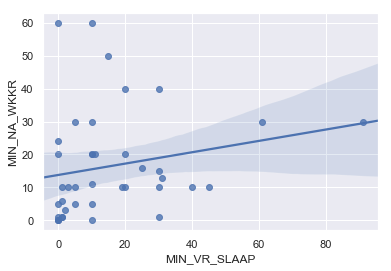

In [153]:
sns.regplot (x = "MIN_VR_SLAAP", y = "MIN_NA_WKKR", data = SLAAP)

<b>interpretatie: </b>wordt de regressie hier niet bepaald door twee outliers? 

<i> zoniet: </i> participanten die rapporteren dat ze de smartphone vroeger voor het slapengaan (groter aantal minuten) aan de kan leggen, rapporteren ook dat ze de smartphone later na het wakker worden terug gebruiken (ook groter aantal minuten). 

#### Deze waarden categoriseren 

##### Stap 1: definiëren van de grenzen vd categorieën

In [173]:
#wat is min en max_waarde van min_vr en na?
SLAAP.describe()

#range van [0-90]
bins = [-1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]

##### Stap 2: definiëren van de categorienamen (names = bins + 1)

In [174]:
names = ['0-5','5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45','45-50','50-55','55-60',
        '60-65','65-70','70-75','75-80','80-85','85-90','90-95']

##### Stap 3: toepassen van pd.cut tot de bedoelde kolom. (! zowel MIN_VR_SLAAP als MIN_NA_WKKR !)

###### MIN_VR_SLAAP_CAT

In [175]:
SLAAP["MIN_VR_SLAAP_CAT"] = pd.cut(SLAAP["MIN_VR_SLAAP"], bins, labels=names)

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### MIN_NA_WKKR_CAT

In [177]:
SLAAP["MIN_NA_WKKR_CAT"] = pd.cut(SLAAP["MIN_NA_WKKR"], bins, labels=names)

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### long format

In [179]:
SLAAP_long = pd.melt(SLAAP, id_vars = "ppn", value_vars=["MIN_VR_SLAAP_CAT", "MIN_NA_WKKR_CAT"])

In [183]:
SLAAP_long_count = SLAAP_long.groupby(["variable", "value"]).count()
SLAAP_long_count.to_excel("SLAAP_long_count.xlsx")

#### <b>heat map:</b> 
<p>gebruik tot welke periode VOOR slaap?</p>
<p>gebruik vanaf welke periode NA slaap? </p>

In [209]:
SLAAP_ht = pd.read_excel("C:/Users/beheerder/SLAAP_long_count.xlsx")
SLAAP_ht["proportie"] = SLAAP_ht["aantal"]/40
heat_SLAAP = SLAAP_ht.pivot("interval","moment", "proportie")
heat_SLAAP.to_excel("heat_SLAAP.xlsx")

In [210]:
heat_SLAAP_ad = pd.read_excel("C:/Users/beheerder/heat_SLAAP.xlsx")
heat_SLAAP_ad.set_index("interval", inplace=True)

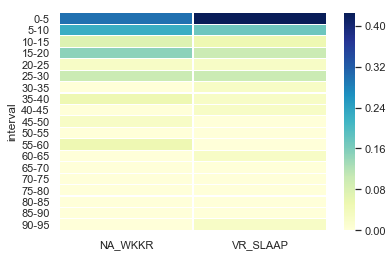

In [213]:
sns.heatmap(heat_SLAAP_ad, cmap="YlGnBu", linewidths=.1)

<b> bar plot: </b> PAS OP: kolommen zijn van volgorde veranderd. 


(0, 40)

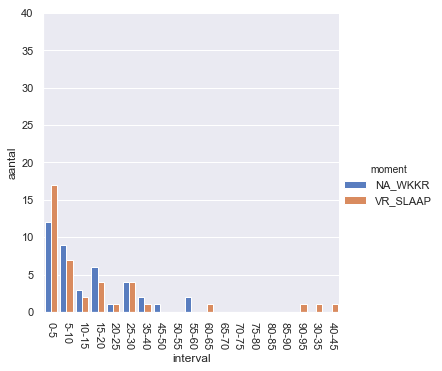

In [218]:
bar_aantal = sns.catplot( x="interval", y="aantal", hue ="moment", data=SLAAP_ht, kind="bar", palette="muted", legend=True)
plt.xticks(rotation=-90)
bar_aantal.ax.set_ylim(0, 40)

(-0.01, 1.0)

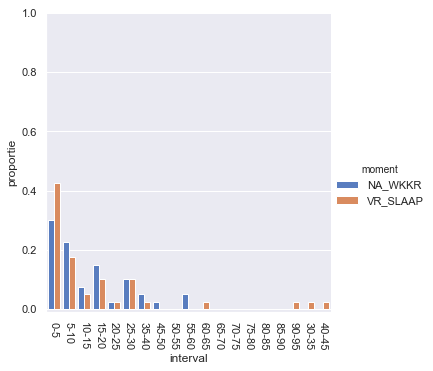

In [220]:
bar_prop = sns.catplot( x="interval", y="proportie", hue ="moment", data=SLAAP_ht, kind="bar", palette="muted", legend=True)
plt.xticks(rotation=-90)
bar_prop.ax.set_ylim(-0.01, 1.0)

## gerapporteerde Bedtijd & Wektijd

###### categorisch benaderd 

In [21]:
#aanmaken van een specifieke dataframe
bed_wek = df[["ppn", "BEDTIJD", "WEKTIJD"]]

#### Long format 
kolom 1: "ppn", kolom 2: "moment" (bed/wek), kolom 3: "tijd" (categorie). 

In [22]:
bed_wek_long = pd.melt(bed_wek, id_vars="ppn", value_vars=["BEDTIJD", "WEKTIJD"])
bed_wek_long_count = bed_wek_long.groupby(["variable", "value"]).count()

values of the index as a specific column

In [23]:
bed_wek_long_count['soort'] = ['BEDTIJD','BEDTIJD','BEDTIJD','BEDTIJD','BEDTIJD',
                                  'BEDTIJD','BEDTIJD','BEDTIJD','BEDTIJD','BEDTIJD',
                                  'BEDTIJD','BEDTIJD','BEDTIJD','BEDTIJD',
                                  'WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD',
                                  'WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD',
                                  'WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD','WEKTIJD']
bed_wek_long_count['tijd'] = ['00U00', '00U30', '01U00', '01U30', '02U00', '02U30','21U30', '22U00', '22U30', '22U50', '23U00', '23U15', '23U30', '23U45',
                              '05U00', '06U00', '06U30', '06U40', '07U00', '07U20', '07U25', '07U30', '07U40', '07U45', '08U00', '08U30', '09U00', '09U30', 
                              '10U00', '10U30', '11U00', '12U00']
bed_wek_long_count.columns = ["aantal", "soort","tijd"]
bed_wek_long_count['proportie'] = bed_wek_long_count['aantal']/40

###### herstructureren 
21U30 - 2u30: slaaptijd <br>
5u - 12u: wektijd 

dag: 00u - 23u59

In [24]:
bed_wek_long_count = bed_wek_long_count.sort_values(by=["tijd"])

#### point plot (aantal & proportie)

(-1, 40)

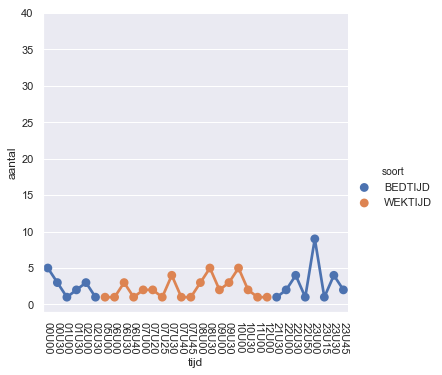

In [25]:
point_aantal = sns.catplot(x="tijd", y="aantal", hue="soort", kind="point", data=bed_wek_long_count, markers='o')
plt.xticks(rotation=-90)
point_aantal.ax.set_ylim(-1, 40)

(-0.01, 1.0)

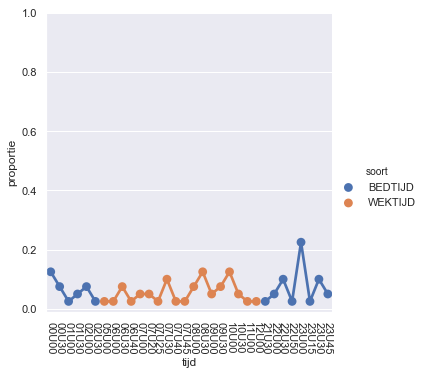

In [26]:
point_prop = sns.catplot(x="tijd", y="proportie", hue="soort", kind="point", data=bed_wek_long_count, markers='o')
plt.xticks(rotation=-90)
point_prop.ax.set_ylim(-0.01, 1.0)

Interessant om deze waarden nu eerst tot categorieën toe te wijzen. <br>
Op basis van de de categorieën dan:
<ul>
    <li>bar plot uittekenen </li>
    <li>heat map uittekenen </li>
</ul>

##### Manueel toekennen aan categorieën: per halfuur. 
Gebeurt via excel, dus:
<ul>
<li> Long dataframe wegschrijven naar excel. </li>
<li> Via excel manueel aanpassen. </li>
<li> Aangepaste Excel uploaden als nieuwe dataframe.</li>
<li> Nodige visualisaties. </li>
    </ul>

###### Stap 1: long dataframe wegschrijven naar Excel 

In [256]:
bed_wek_long_count.to_excel("bed_wek.xlsx")

###### Stap 2: via Excel manueel aanpassen

###### Stap 3: aangepaste Excel uploaden als nieuwe dataframe

In [260]:
BED_WEK = pd.read_excel("C:/Users/beheerder/bed_wek.xlsx")
BED_WEK = BED_WEK[["soort", "tijd_cat", "aantal"]]

###### Stap 4: groeperen en aantallen/proporties tellen obv tijd_cat

In [264]:
BED_WEK_cat = BED_WEK.groupby(["tijd_cat", "soort"]).count()

###### Stap 5: opnieuw naar Excel om deze dataframe eenvoudig aan te passen en te vervolledigen. 

In [267]:
BED_WEK_cat.to_excel("bed_wek_cat.xlsx")

###### Stap 6: voeg de proportie toe (want aantal herberekend) en pivoteer. 

In [272]:
B_W_cat = pd.read_excel("C:/Users/beheerder/bed_wek_cat.xlsx")
B_W_cat["proportie"] = B_W_cat["aantal"]/40

#### visualiseren

##### bar plot (aantal & proportie)

(-1.0, 40.0)

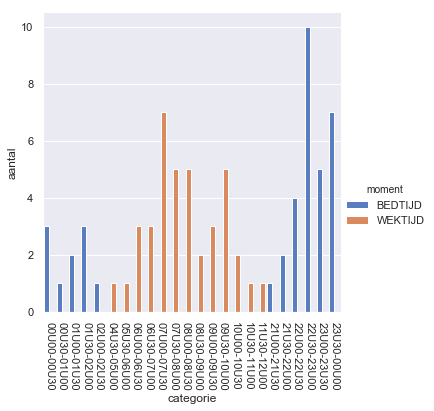

In [277]:
bar_aantal = sns.catplot( x="categorie", y="aantal", hue ="moment", data=B_W_cat, kind="bar", palette="muted", legend=True)
plt.xticks(rotation=-90)
bar_prop.ax.set_ylim(-1.0, 40.0)

(-0.01, 1.0)

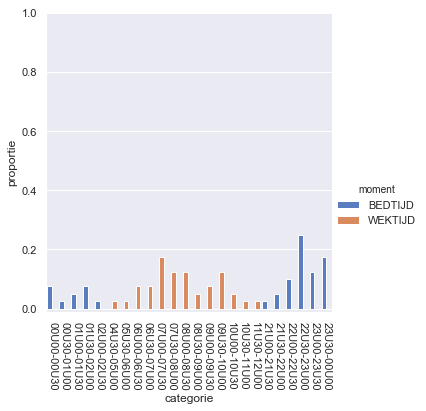

In [278]:
bar_prop = sns.catplot( x="categorie", y="proportie", hue ="moment", data=B_W_cat, kind="bar", palette="muted", legend=True)
plt.xticks(rotation=-90)
bar_prop.ax.set_ylim(-0.01, 1.0)

##### heat map (enkel proportie)

In [274]:
heat_B_W_cat = B_W_cat.pivot("categorie","moment", "proportie")

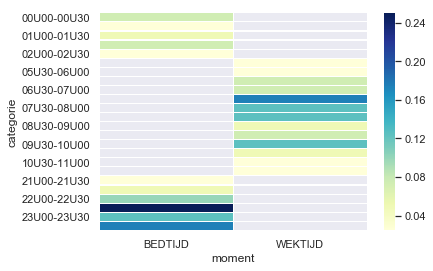

In [276]:
sns.heatmap(heat_B_W_cat, cmap="YlGnBu", linewidths=.1)

## Multitasking preference 

#### Samengetelde MT score: 1 = helemaal niet akkoord, 7 = helemaal akkoord

MT continu bekeken 

In [46]:
#aanmaken dataframe die puur kijkt naar MT
MT = df[["MT"]]

###### visualisatie van continue verdeling van MT 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


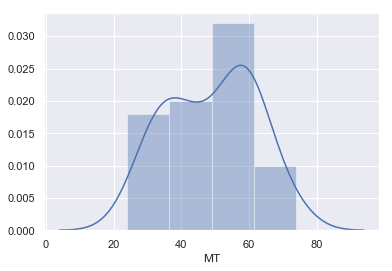

In [306]:
#continue verdeling van MT 
sns.set();
sns.distplot(MT["MT"])

MT categorisch bekeken 

<b>Methode:</b> categoriseren via pd.cut => nieuwe kolom = categorisch <br>
<b>Vraag: </b> hoeveel participanten (aantal/proportie) per categorie? <br>


###### Stap 1: definiëren van grenzen 
Welke grenzen nodig?: bepalen via min en max waarden die we bekomen bij .describe(). 

In [307]:
MT.describe() 

,MT
count,40.000000
mean,48.925000
std,13.131265
min,24.000000
25%,37.750000
50%,50.500000
75%,59.250000
max,74.000000


Op basis van deze scores kunnen de scores ook op een andere manier worden gecategoriseerd; namelijk als "voorkeur om niet te multitasken", "neutraal", "sterke voorkeur om te multitasken".
<ul>
    <li>Via min, max, mean en std kunnen we bepalen: ondergrens1, ondergrens2, ondergrens3, bovengrens3 <br>
    <i> Belangrijk is dat bovengrens1 = ondergrens2. </li>
    <li>Definieer de bins en de names</li>
    <li>Via pd.cut krijgen we dus een nieuwe kolom die aangeeft of iemand voorkeur heeft om niet te multitasken, neutraal is of een sterke voorkeur heeft om te multitasken.</li>
</ul>        

In [11]:
meanMT = 48.925
stdMT = 13.131
minMT = 24
maxMT = 74

In [25]:
ondergrens1 = minMT-4
ondergrens2 = meanMT - stdMT
ondergrens3 = meanMT + stdMT
bovengrens3 = maxMT+6


###### Toont dat min = 24 & max = 74. De boven- en ondergrens moeten dus zeker die waarden omvatten. 

In [18]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 103]

In [26]:
binsMT = [ondergrens1, ondergrens2, ondergrens3, bovengrens3]

###### Stap 2: definiëren van categorienamen. 

In [20]:
names = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90 - 103']

In [27]:
namesMT = ["geen voorkeur om te multitasken", "multitasking neutraal", "sterke voorkeur om te multitasken"]

###### Stap 3: toepassen van pd.cut op de numerieke kolom die je nu graag categorisch wil gaan benaderen. 

In [47]:
MT['MT_categ'] = pd.cut(MT['MT'], bins, labels=names)

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
MT["MT_cat"] = pd.cut(MT["MT"], binsMT, labels=namesMT)
MT

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MT,MT_categ,MT_cat
0,30,20-30,geen voorkeur om te multitasken
1,34,30-40,geen voorkeur om te multitasken
2,31,30-40,geen voorkeur om te multitasken
3,59,50-60,multitasking neutraal
4,33,30-40,geen voorkeur om te multitasken
5,45,40-50,multitasking neutraal
6,24,20-30,geen voorkeur om te multitasken
7,43,40-50,multitasking neutraal
8,67,60-70,sterke voorkeur om te multitasken
9,29,20-30,geen voorkeur om te multitasken


De bovengrens van een categorie is steeds nog geïmplementeerd in de categorie, de ondergrens van een categorie is nooit geïmplementeerd aangezien dit de bovengrens van de vorige categorie is. 


###### Stap 4: aantal participanten die tot een categorie behoren tellen 
aantal via count, proportie door aantal/40

In [50]:
MT_count = MT.groupby(["MT_categ"]).count()
MT_count["categorie"] = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90 - 103']
MT_count["proportie"] = MT_count["MT"]/40
MT_count.columns = ['aantal', 'categorieMT', 'proportie']
MT_count = MT_count[['categorieMT', 'aantal', 'proportie']]
MT_count

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

In [51]:
MT_cat_count = MT.groupby(["MT_cat"]).count()
MT_cat_count = MT_cat_count[["MT_categ"]]
MT_cat_count.columns = ["aantal"]
MT_cat_count["proportie"] = MT_cat_count/40
MT_cat_count

,aantal,proportie
MT_cat,,
geen voorkeur om te multitasken,9,0.225
multitasking neutraal,26,0.650
sterke voorkeur om te multitasken,5,0.125


In [ ]:
Deze aantallen straks gebruiken om de proporties te berekenen nodig voor de heatmap voor de verschillende groepen. 

Nu weten we dus hoeveel personen er per groep behoren. Deze personen moeten geselecteerd worden en dan van hen per categorie de Multitasking antwoord patroon uit selecteren. 

<b>volgende stap:</b> specifieke antwoorden op dataframe bepalen op basis van categorie. Zie verder. 

#### visualisatie vd multitasking scores:
hogere score = meer gerapporteerde voorkeur om te multitasken

###### pointplot (aantal & proportie)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

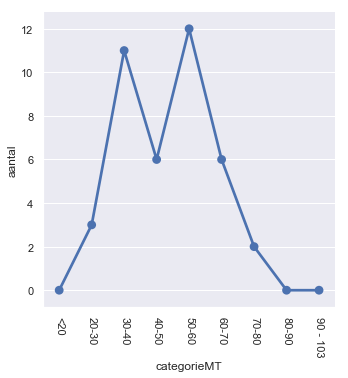

In [322]:
sns.catplot(x="categorieMT", y="aantal", kind="point", data=MT_count, markers='o')
plt.xticks(rotation=-90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

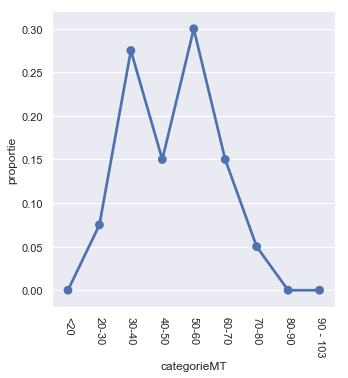

In [323]:
sns.catplot(x="categorieMT", y="proportie", kind="point", data=MT_count, markers='o')
plt.xticks(rotation=-90)

###### barplot (aantal & proportie)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

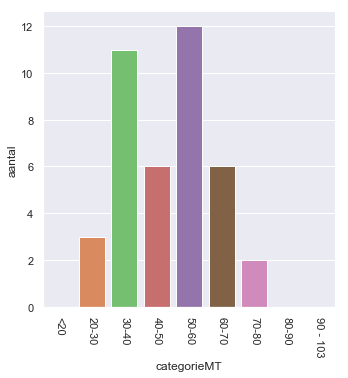

In [325]:
sns.catplot( x="categorieMT", y="aantal",  data=MT_count, kind="bar", palette="muted")
plt.xticks(rotation=-90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

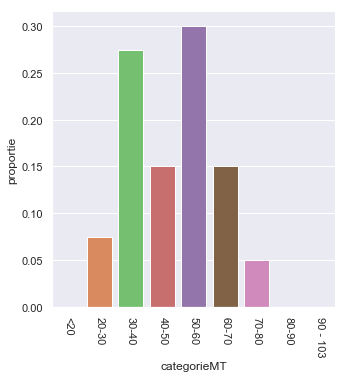

In [328]:
sns.catplot( x="categorieMT", y="proportie",  data=MT_count, kind="bar", palette="muted")
plt.xticks(rotation=-90)

##### relatie opgetelde MTscore met andere variabelen 

voorkeur voor multitasking gelinkt met tot hoelang men de smartphone gebruikt voor het slapengaan en wanneer men deze opnieuw gebruikt? 


In [28]:
#specifieke dataframe aanmaken
SLAAP_MT = df[["MIN_VR_SLAAP", "MIN_NA_WKKR", "MT"]]

###### visualiseren

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


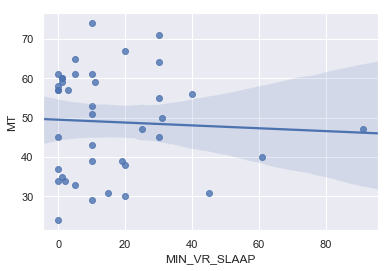

In [331]:
sns.regplot(x = "MIN_VR_SLAAP", y="MT", data=SLAAP_MT)

In [29]:
corr, p_value = pearsonr(SLAAP_MT[["MIN_VR_SLAAP"]], SLAAP_MT[["MT"]])
print(corr, p_value)

[-0.05250035] [0.74765395]


Toont een <b>niet-significante negatieve trend</b><br>


C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


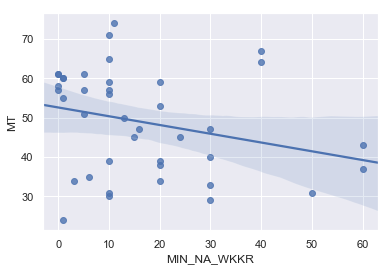

In [334]:
sns.regplot(x = "MIN_NA_WKKR", y="MT", data=SLAAP_MT)

In [30]:
corr, p_value = pearsonr(SLAAP_MT[["MIN_NA_WKKR"]], SLAAP_MT[["MT"]])
print(corr, p_value)

[-0.27059051] [0.09126444]


Suggereert een <b>niet-significante negatieve trend</b>:</br>
Hoe lager de MT preference score (minder voorkeur om te multitasken), hoe later men de smartphone terug gebruikt na het wakker worden. 
    

#### Heatmap MT vragenlijst:
welk antwoord komt het meest voor op elke vraag? 
Wat is het meest voorkomende antwoordpatroon? 

Geschaald van 1-7: omgeschaalde waarden rechtstreeks gebruiken. 

In [43]:
#specifieke dataframe aanmaken. 
multitasking = df[["ppn", "MT_1", "MT_2", "MT_3", "MT_4", "MT_5", "MT_6", "MT_7",  "MT_8", "MT_9", "MT_10", "MT_11_R", "MT_12", "MT_13", "MT_14_R", "MT_VGL_R"]]
multitasking

,ppn,MT_1,MT_2,MT_3,MT_4,MT_5,MT_6,MT_7,MT_8,MT_9,MT_10,MT_11_R,MT_12,MT_13,MT_14_R,MT_VGL_R
0,1,2,1,1,1,1,1,1,1,1,5,5,1,1,4,4
1,2,1,1,1,5,2,1,2,1,3,1,5,1,3,2,5
2,3,1,1,1,1,1,1,1,1,1,2,7,1,1,7,4
3,4,2,2,2,4,3,4,6,3,4,6,6,4,3,6,4
4,5,1,1,1,1,1,1,1,1,1,4,7,1,1,7,4
5,6,1,3,4,2,4,4,5,1,2,4,3,4,1,5,2
6,8,1,1,2,1,1,1,4,1,1,1,2,1,1,2,4
7,9,1,4,3,3,4,1,4,4,4,1,6,1,1,3,3
8,10,2,4,4,6,5,5,1,5,5,6,7,1,4,7,5
9,11,1,1,1,1,2,1,1,1,1,2,7,1,1,3,5


In [53]:
MT_categoric = pd.concat([multitasking,MT,], axis=1)
MT_categoric

,ppn,MT_1,MT_2,MT_3,MT_4,MT_5,MT_6,MT_7,MT_8,MT_9,MT_10,MT_11_R,MT_12,MT_13,MT_14_R,MT_VGL_R,MT,MT_categ,MT_cat
0,1,2,1,1,1,1,1,1,1,1,5,5,1,1,4,4,30,20-30,geen voorkeur om te multitasken
1,2,1,1,1,5,2,1,2,1,3,1,5,1,3,2,5,34,30-40,geen voorkeur om te multitasken
2,3,1,1,1,1,1,1,1,1,1,2,7,1,1,7,4,31,30-40,geen voorkeur om te multitasken
3,4,2,2,2,4,3,4,6,3,4,6,6,4,3,6,4,59,50-60,multitasking neutraal
4,5,1,1,1,1,1,1,1,1,1,4,7,1,1,7,4,33,30-40,geen voorkeur om te multitasken
5,6,1,3,4,2,4,4,5,1,2,4,3,4,1,5,2,45,40-50,multitasking neutraal
6,8,1,1,2,1,1,1,4,1,1,1,2,1,1,2,4,24,20-30,geen voorkeur om te multitasken
7,9,1,4,3,3,4,1,4,4,4,1,6,1,1,3,3,43,40-50,multitasking neutraal
8,10,2,4,4,6,5,5,1,5,5,6,7,1,4,7,5,67,60-70,sterke voorkeur om te multitasken
9,11,1,1,1,1,2,1,1,1,1,2,7,1,1,3,5,29,20-30,geen voorkeur om te multitasken


Nu moeten de participanten geselecteerd worden op basis van hun waarde op MT_cat

In [63]:
GVOMT = MT_categoric.loc[MT_categoric ["MT_cat"] == "geen voorkeur om te multitasken"]
GVOMT
MTN = MT_categoric.loc[MT_categoric ["MT_cat"] == "multitasking neutraal"]
MTN
SVOMMT = MT_categoric.loc[MT_categoric ["MT_cat"] == "sterke voorkeur om te multitasken"]
SVOMMT

,ppn,MT_1,MT_2,MT_3,MT_4,MT_5,MT_6,MT_7,MT_8,MT_9,MT_10,MT_11_R,MT_12,MT_13,MT_14_R,MT_VGL_R,MT,MT_categ,MT_cat
8,10,2,4,4,6,5,5,1,5,5,6,7,1,4,7,5,67,60-70,sterke voorkeur om te multitasken
22,24,4,7,7,4,4,2,1,6,6,1,7,1,4,7,4,65,60-70,sterke voorkeur om te multitasken
28,31,5,5,4,6,5,5,4,4,6,6,2,5,2,2,3,64,60-70,sterke voorkeur om te multitasken
32,35,4,5,5,4,4,1,5,5,6,5,7,4,4,7,5,71,70-80,sterke voorkeur om te multitasken
33,36,2,5,6,6,5,7,4,4,4,6,5,5,6,5,4,74,70-80,sterke voorkeur om te multitasken


<b>In long format plaatsen:</b><br>
nodige kolommen: 
<ul>
    <li> Welke vraag van de MT vragenlijst </li>
    <li> Welke waarde gereageerd </li>
    <li> Hoe vaak (aantal/proportie) werd die waarde aangeduid op die bepaalde vraag </li>
</ul>

In [ ]:
multitasking_long = pd.melt(multitasking, id_vars = "ppn", value_vars = ["MT_1", "MT_2", "MT_3", "MT_4", "MT_5", "MT_6", "MT_7",  "MT_8", "MT_9", "MT_10", "MT_11_R", "MT_12", "MT_13", "MT_14_R", "MT_VGL_R"])
multitasking_long_count = multitasking_long.groupby(["variable", "value"]).count()
multitasking_long_count["proportie"] = multitasking_long_count["ppn"]/40

In [67]:
multitasking_long_GVOMT = pd.melt(GVOMT, id_vars = "ppn", value_vars = ["MT_1", "MT_2", "MT_3", "MT_4", "MT_5", "MT_6", "MT_7",  "MT_8", "MT_9", "MT_10", "MT_11_R", "MT_12", "MT_13", "MT_14_R", "MT_VGL_R"])
multitasking_long_GVOMT_count = multitasking_long_GVOMT.groupby(["variable", "value"]).count()
multitasking_long_GVOMT_count["proportie"] = multitasking_long_GVOMT_count["ppn"]/40
multitasking_long_GVOMT_count

ppn  proportie
variable value                
MT_1     1        8      0.200
         2        1      0.025
MT_10    1        3      0.075
         2        3      0.075
         4        1      0.025
         5        1      0.025
         7        1      0.025
MT_11_R  1        1      0.025
         2        1      0.025
         5        2      0.050
         7        5      0.125
MT_12    1        8      0.200
         3        1      0.025
MT_13    1        8      0.200
         3        1      0.025
MT_14_R  1        1      0.025
         2        3      0.075
         3        1      0.025
         4        1      0.025
         7        3      0.075
MT_2     1        8      0.200
         2        1      0.025
MT_3     1        6      0.150
         2        2      0.050
         3        1      0.025
MT_4     1        8      0.200
         5        1      0.025
MT_5     1        5      0.125
         2        3      0.075
         3        1      0.025
MT_6     1        8      0.200
         3        1      0.025
MT_7     1        5      0.125
         2        2      0.050
         4        1      0.025
         6        1      0.025
MT_8     1        8      0.200
         2        1      0.025
MT_9     1        7      0.175
         3        1      0.025
         4        1      0.025
MT_VGL_R 3        1      0.025
         4        6      0.150
         5        2      0.050

In [68]:
multitasking_long_MTN = pd.melt(MTN, id_vars = "ppn", value_vars = ["MT_1", "MT_2", "MT_3", "MT_4", "MT_5", "MT_6", "MT_7",  "MT_8", "MT_9", "MT_10", "MT_11_R", "MT_12", "MT_13", "MT_14_R", "MT_VGL_R"])
multitasking_long_MTN_count = multitasking_long_MTN.groupby(["variable", "value"]).count()
multitasking_long_MTN_count["proportie"] = multitasking_long_MTN_count["ppn"]/40
multitasking_long_MTN_count

ppn  proportie
variable value                
MT_1     1        7      0.175
         2        8      0.200
         3        3      0.075
         4        4      0.100
         5        4      0.100
MT_10    1        9      0.225
         2        4      0.100
         3        5      0.125
         4        3      0.075
         5        2      0.050
         6        1      0.025
         7        2      0.050
MT_11_R  2        1      0.025
         3        7      0.175
         4        2      0.050
         5        2      0.050
         6        8      0.200
         7        6      0.150
MT_12    1       12      0.300
         2        8      0.200
         3        1      0.025
         4        2      0.050
         5        3      0.075
MT_13    1        3      0.075
         2        4      0.100
         3       15      0.375
         4        4      0.100
MT_14_R  1        2      0.050
         3        6      0.150
         4        4      0.100
...             ...        ...
MT_6     1        9      0.225
         3        3      0.075
         4        6      0.150
         5        4      0.100
         6        3      0.075
         7        1      0.025
MT_7     1        4      0.100
         2        1      0.025
         3        4      0.100
         4        6      0.150
         5        7      0.175
         6        3      0.075
         7        1      0.025
MT_8     1        4      0.100
         2        3      0.075
         3        8      0.200
         4        6      0.150
         5        4      0.100
         6        1      0.025
MT_9     1        4      0.100
         2        5      0.125
         3        1      0.025
         4        6      0.150
         5        6      0.150
         6        3      0.075
         7        1      0.025
MT_VGL_R 2        4      0.100
         3        8      0.200
         4       11      0.275
         5        3      0.075

[86 rows x 2 columns]

In [69]:
multitasking_long_SVOMMT = pd.melt(SVOMMT, id_vars = "ppn", value_vars = ["MT_1", "MT_2", "MT_3", "MT_4", "MT_5", "MT_6", "MT_7",  "MT_8", "MT_9", "MT_10", "MT_11_R", "MT_12", "MT_13", "MT_14_R", "MT_VGL_R"])
multitasking_long_SVOMMT_count = multitasking_long_SVOMMT.groupby(["variable", "value"]).count()
multitasking_long_SVOMMT_count["proportie"] = multitasking_long_SVOMMT_count["ppn"]/40
multitasking_long_SVOMMT_count

ppn  proportie
variable value                
MT_1     2        2      0.050
         4        2      0.050
         5        1      0.025
MT_10    1        1      0.025
         5        1      0.025
         6        3      0.075
MT_11_R  2        1      0.025
         5        1      0.025
         7        3      0.075
MT_12    1        2      0.050
         4        1      0.025
         5        2      0.050
MT_13    2        1      0.025
         4        3      0.075
         6        1      0.025
MT_14_R  2        1      0.025
         5        1      0.025
         7        3      0.075
MT_2     4        1      0.025
         5        3      0.075
         7        1      0.025
MT_3     4        2      0.050
         5        1      0.025
         6        1      0.025
         7        1      0.025
MT_4     4        2      0.050
         6        3      0.075
MT_5     4        2      0.050
         5        3      0.075
MT_6     1        1      0.025
         2        1      0.025
         5        2      0.050
         7        1      0.025
MT_7     1        2      0.050
         4        2      0.050
         5        1      0.025
MT_8     4        2      0.050
         5        2      0.050
         6        1      0.025
MT_9     4        1      0.025
         5        1      0.025
         6        3      0.075
MT_VGL_R 3        1      0.025
         4        2      0.050
         5        2      0.050

Ook de opgesplitste dataframes obv MT voorkeur kunnen in long format geplaatst worden om dan straks de verschillende heat maps te bekijken. 

kolommen staan opnieuw niet in de juiste volgorde + ontbrekende waarden aanvullen (0) => manueel aanpassen via Excel. 

In [343]:
multitasking_long_count.to_excel("multitasking_long_count.xlsx")

In [72]:
multitasking_long_GVOMT_count.to_excel("multitasking_long_GVOMT_count.xlsx")

In [79]:
multitasking_long_MTN_count.to_excel("multitasking_long_MTN_count.xlsx")

In [84]:
multitasking_long_SVOMMT_count.to_excel("multitasking_long_SVOMMT_count.xlsx")

Deze aangepaste dataframe terug inlezen 

In [75]:
MultiTask = pd.read_excel("C:/Users/beheerder/multitasking_long_count.xlsx")
MultiTask = MultiTask[["vraag", "waarde", "aantal", "proportie"]]

In [87]:
MultiTask_GVOMT = pd.read_excel("C:/Users/beheerder/multitasking_long_GVOMT_count.xlsx")
MultiTask_GVOMT = MultiTask_GVOMT[["vraag", "antwoord", "ppn", "proportie"]]

In [88]:
MultiTask_MTN = pd.read_excel("C:/Users/beheerder/multitasking_long_MTN_count.xlsx")
MultiTask_MTN = MultiTask_MTN[["vraag", "antwoord", "ppn", "proportie"]]

In [89]:
MultiTask_SVOMMT = pd.read_excel("C:/Users/beheerder/multitasking_long_SVOMMT_count.xlsx")
MultiTask_SVOMMT = MultiTask_SVOMMT[["vraag", "antwoord", "ppn", "proportie"]]

In [90]:
heat_MultiTask = MultiTask.pivot("vraag","waarde", "proportie")
heat_MultiTask_GVOMT = MultiTask_GVOMT.pivot("vraag", "antwoord", "proportie")
heat_MultiTask_GVOMT

antwoord,1,2,3,4,5,6,7
vraag,,,,,,,
MT_1,0.000000,0.222222,0.000000,0.222222,0.111111,0.000000,0.000000
MT_10,0.111111,0.000000,0.000000,0.000000,0.111111,0.333333,0.000000
MT_11_R,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.333333
MT_12,0.222222,0.000000,0.000000,0.111111,0.222222,0.000000,0.000000
MT_13,0.000000,0.111111,0.000000,0.333333,0.000000,0.111111,0.000000
MT_14_R,0.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.333333
MT_2,0.000000,0.000000,0.000000,0.111111,0.333333,0.000000,0.111111
MT_3,0.000000,0.000000,0.000000,0.222222,0.111111,0.111111,0.111111
MT_4,0.000000,0.000000,0.000000,0.222222,0.000000,0.333333,0.000000


In [91]:
heat_MultiTask_MTN = MultiTask.pivot("vraag","waarde", "proportie")
heat_MultiTask_MTN = MultiTask_MTN.pivot("vraag", "antwoord", "proportie")
heat_MultiTask_MTN

antwoord,1,2,3,4,5,6,7
vraag,,,,,,,
MT_1,0.269231,0.307692,0.115385,0.153846,0.153846,0.000000,0.000000
MT_10,0.346154,0.153846,0.192308,0.115385,0.076923,0.038462,0.076923
MT_11_R,0.000000,0.038462,0.269231,0.076923,0.076923,0.307692,0.230769
MT_12,0.461538,0.307692,0.038462,0.076923,0.115385,0.000000,0.000000
MT_13,0.115385,0.153846,0.576923,0.153846,0.000000,0.000000,0.000000
MT_14_R,0.076923,0.000000,0.230769,0.153846,0.192308,0.230769,0.115385
MT_2,0.038462,0.192308,0.192308,0.307692,0.115385,0.115385,0.038462
MT_3,0.038462,0.230769,0.269231,0.307692,0.115385,0.038462,0.000000
MT_4,0.269231,0.192308,0.230769,0.230769,0.076923,0.000000,0.000000


In [92]:
heat_MultiTask_SVOMMT = MultiTask.pivot("vraag","waarde", "proportie")
heat_MultiTask_SVOMMT = MultiTask_SVOMMT.pivot("vraag", "antwoord", "proportie")
heat_MultiTask_SVOMMT

antwoord,1,2,3,4,5,6,7
vraag,,,,,,,
MT_1,0.0,0.4,0.0,0.4,0.2,0.0,0.0
MT_10,0.2,0.0,0.0,0.0,0.2,0.6,0.0
MT_11_R,0.0,0.2,0.0,0.0,0.2,0.0,0.6
MT_12,0.4,0.0,0.0,0.2,0.4,0.0,0.0
MT_13,0.0,0.2,0.0,0.6,0.0,0.2,0.0
MT_14_R,0.0,0.2,0.0,0.0,0.2,0.0,0.6
MT_2,0.0,0.0,0.0,0.2,0.6,0.0,0.2
MT_3,0.0,0.0,0.0,0.4,0.2,0.2,0.2
MT_4,0.0,0.0,0.0,0.4,0.0,0.6,0.0


Vragen (stellen rijen voor) opnieuw niet in de juiste volgorde: aanpassen en terug inlezen via Excel. 

In [353]:
heat_MultiTask.to_excel("heat_MultiTask.xlsx")

In [94]:
heat_MultiTask_GVOMT.to_excel("heat_MultiTask_GVOMT.xlsx")
heat_MultiTask_MTN.to_excel("heat_MultiTask_MTN.xlsx")
heat_MultiTask_SVOMMT.to_excel("heat_MultiTask_SVOMMT.xlsx")

In [362]:
heat_MultiTask = pd.read_excel("C:/Users/beheerder/heat_MultiTask.xlsx")
heat_MultiTask

,vraag,1,2,3,4,5,6,7
0,MT_1,0.375,0.275,0.075,0.150,0.125,0.000,0.000
1,MT_2,0.225,0.150,0.125,0.225,0.150,0.075,0.050
2,MT_3,0.175,0.200,0.200,0.250,0.100,0.050,0.025
3,MT_4,0.375,0.125,0.150,0.200,0.075,0.075,0.000
4,MT_5,0.125,0.150,0.150,0.275,0.250,0.050,0.000
5,MT_6,0.450,0.025,0.100,0.150,0.150,0.075,0.050
6,MT_7,0.275,0.075,0.100,0.225,0.200,0.100,0.025
7,MT_8,0.300,0.100,0.200,0.200,0.150,0.050,0.000
8,MT_9,0.275,0.125,0.050,0.200,0.175,0.150,0.025
9,MT_10,0.325,0.175,0.125,0.100,0.100,0.100,0.075


In [95]:
heat_MultiTask_GVOMT= pd.read_excel("C:/Users/beheerder/heat_MultiTask_GVOMT.xlsx")
heat_MultiTask_MTN = pd.read_excel("C:/Users/beheerder/heat_MultiTask_MTN.xlsx")
heat_MultiTask_SVOMMT = pd.read_excel("C:/Users/beheerder/heat_MultiTask_SVOMMT.xlsx")

In [96]:
heat_MultiTask_GVOMT

,vraag,1,2,3,4,5,6,7
0,MT_1,0.000000,0.222222,0.000000,0.222222,0.111111,0.000000,0.000000
1,MT_2,0.000000,0.000000,0.000000,0.111111,0.333333,0.000000,0.111111
2,MT_3,0.000000,0.000000,0.000000,0.222222,0.111111,0.111111,0.111111
3,MT_4,0.000000,0.000000,0.000000,0.222222,0.000000,0.333333,0.000000
4,MT_5,0.000000,0.000000,0.000000,0.222222,0.333333,0.000000,0.000000
5,MT_6,0.111111,0.111111,0.000000,0.000000,0.222222,0.000000,0.111111
6,MT_7,0.222222,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000
7,MT_8,0.000000,0.000000,0.000000,0.222222,0.222222,0.111111,0.000000
8,MT_9,0.000000,0.000000,0.000000,0.111111,0.111111,0.333333,0.000000
9,MT_10,0.111111,0.000000,0.000000,0.000000,0.111111,0.333333,0.000000


In [97]:
heat_MultiTask_MTN

,vraag,1,2,3,4,5,6,7
0,MT_1,0.269231,0.307692,0.115385,0.153846,0.153846,0.000000,0.000000
1,MT_2,0.038462,0.192308,0.192308,0.307692,0.115385,0.115385,0.038462
2,MT_3,0.038462,0.230769,0.269231,0.307692,0.115385,0.038462,0.000000
3,MT_4,0.269231,0.192308,0.230769,0.230769,0.076923,0.000000,0.000000
4,MT_5,0.000000,0.115385,0.192308,0.346154,0.269231,0.076923,0.000000
5,MT_6,0.346154,0.000000,0.115385,0.230769,0.153846,0.115385,0.038462
6,MT_7,0.153846,0.038462,0.153846,0.230769,0.269231,0.115385,0.038462
7,MT_8,0.153846,0.115385,0.307692,0.230769,0.153846,0.038462,0.000000
8,MT_9,0.153846,0.192308,0.038462,0.230769,0.230769,0.115385,0.038462
9,MT_10,0.346154,0.153846,0.192308,0.115385,0.076923,0.038462,0.076923


In [98]:
heat_MultiTask_SVOMMT

,vraag,1,2,3,4,5,6,7
0,MT_1,0.0,0.4,0.0,0.4,0.2,0.0,0.0
1,MT_2,0.0,0.0,0.0,0.2,0.6,0.0,0.2
2,MT_3,0.0,0.0,0.0,0.4,0.2,0.2,0.2
3,MT_4,0.0,0.0,0.0,0.4,0.0,0.6,0.0
4,MT_5,0.0,0.0,0.0,0.4,0.6,0.0,0.0
5,MT_6,0.2,0.2,0.0,0.0,0.4,0.0,0.2
6,MT_7,0.4,0.0,0.0,0.4,0.2,0.0,0.0
7,MT_8,0.0,0.0,0.0,0.4,0.4,0.2,0.0
8,MT_9,0.0,0.0,0.0,0.2,0.2,0.6,0.0
9,MT_10,0.2,0.0,0.0,0.0,0.2,0.6,0.0


kolom die vragen aangeeft moet als index van de heatmap geplaatst worden; dit is niet het geval wanneer je deze initieel uit Excel haalt na de aanpassing. 

In [99]:
heat_MultiTask.set_index("vraag", inplace=True)

In [100]:
heat_MultiTask_GVOMT.set_index("vraag", inplace=True)
heat_MultiTask_MTN.set_index("vraag", inplace=True)
heat_MultiTask_SVOMMT.set_index("vraag", inplace=True)

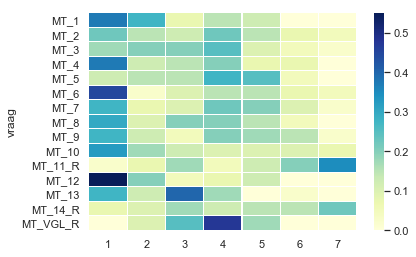

In [364]:
sns.heatmap(heat_MultiTask, cmap="YlGnBu", linewidths=.1) 

<b>Interpretatie: </b> overwegend worden de vragen beantwoord als "helemaal niet akkoord".

,1,2,3,4,5,6,7
vraag,,,,,,,
MT_1,0.000000,0.222222,0.000000,0.222222,0.111111,0.000000,0.000000
MT_2,0.000000,0.000000,0.000000,0.111111,0.333333,0.000000,0.111111
MT_3,0.000000,0.000000,0.000000,0.222222,0.111111,0.111111,0.111111
MT_4,0.000000,0.000000,0.000000,0.222222,0.000000,0.333333,0.000000
MT_5,0.000000,0.000000,0.000000,0.222222,0.333333,0.000000,0.000000
MT_6,0.111111,0.111111,0.000000,0.000000,0.222222,0.000000,0.111111
MT_7,0.222222,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000
MT_8,0.000000,0.000000,0.000000,0.222222,0.222222,0.111111,0.000000
MT_9,0.000000,0.000000,0.000000,0.111111,0.111111,0.333333,0.000000


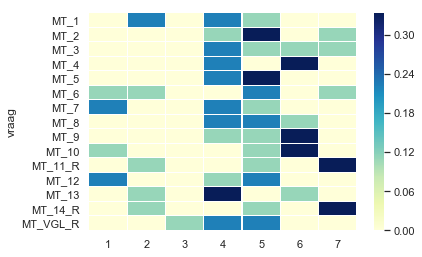

In [104]:
sns.heatmap(heat_MultiTask_GVOMT, cmap="YlGnBu", linewidths=.1)
heat_MultiTask_GVOMT

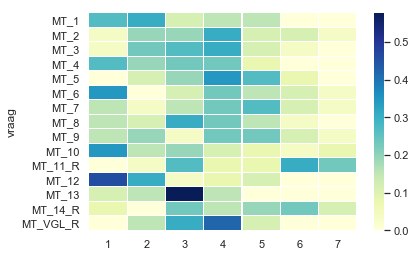

In [102]:
sns.heatmap(heat_MultiTask_MTN, cmap="YlGnBu", linewidths=.1)

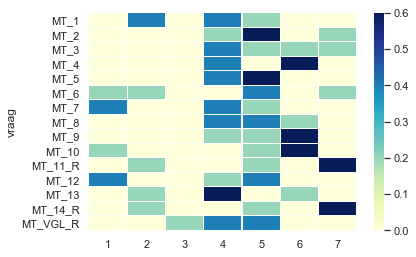

In [103]:
sns.heatmap(heat_MultiTask_SVOMMT, cmap="YlGnBu", linewidths=.1)

toch werken met dezelfde proportie want dit vind ik nu moeilijk om te gaan interpreteren?

nog heel veel combo's mogelijk met MT: is karakteristiek van interesse. <br>
Mogelijke aanvullingen??
<br>

## TOT_SLAAP 
Hoeveel minuten geeft een participant aan dat het duurt tot hij/zij slaapt? <br>
Gelinkt aan geschatte gebruik van smartphone voor slaap? 

#### continu

In [33]:
#specifieke dataframe aanmaken 
slaap = df[["TOT_SLAAP"]]
slaap

,TOT_SLAAP
0,90.0
1,4.0
2,20.0
3,10.0
4,20.0
5,60.0
6,15.0
7,25.0
8,60.0
9,20.0


NAN verwijderen 


In [34]:
slaap["TOT_SLAAP"] = pd.to_numeric(slaap["TOT_SLAAP"], errors='coerce')
slaap = slaap.dropna(subset=["TOT_SLAAP"])
slaap["TOT_SLAAP"] = slaap["TOT_SLAAP"].astype(int)
slaap["TOT_SLAAP"]

C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\beheerder\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     90
1      4
2     20
3     10
4     20
5     60
6     15
7     25
8     60
9     20
10     8
11    60
12    30
13    10
14    15
15    30
17    10
18    60
19    40
20    20
21    30
22    10
23    15
24    15
25     5
26    10
27    30
28    10
29    15
30     5
31    50
32    25
33    15
34    30
35    30
36    20
37    15
38    15
39    40
Name: TOT_SLAAP, dtype: int32

##### visualiseren

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


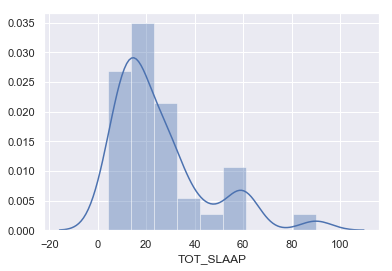

In [35]:
sns.set();
sns.distplot(slaap["TOT_SLAAP"])

##### regresseer

Is het aantal gerapporteerde minuten tot ze slapen gelinkt met het aantal minuten gebruik tot slaap? 

In [36]:
#specifieke dataframe
regressie_slaap = df[["MIN_VR_SLAAP", "TOT_SLAAP"]]

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


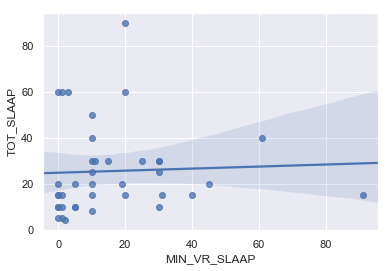

In [37]:
sns.regplot (x = "MIN_VR_SLAAP", y = "TOT_SLAAP", data = regressie_slaap)
#suggereert een positief verband: meer minuten voor slapen, later slaap; maar ziet er totaal niet significant uit. 

In [39]:
corr, p_value = pearsonr(regressie_slaap[["MIN_VR_SLAAP"]], regressie_slaap[["TOT_SLAAP"]])
print(corr, p_value)

[nan] [1.]


C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:3014: RuntimeWarning: invalid value encountered in greater
  r = max(min(r, 1.0), -1.0)
C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:3014: RuntimeWarning: invalid value encountered in less
  r = max(min(r, 1.0), -1.0)
C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


<b> Interpretatie: </b> contra-intuitief positief verband; wil zeggen dat wanneer ze rapporteren dat het langer duurt om in slaap te raken, ze ook hun smartphone vroeger voor het slapen aan de kant leggen. 

#### Categorisch

##### Stap 1: definieer de grenzen 

Welke algemene boven- en ondergrens? => gebasseerd op min en max value gevonden via .describe(). 

In [378]:
slaap.describe()

,TOT_SLAAP
count,39.000000
mean,25.435897
std,19.295206
min,4.000000
25%,12.500000
50%,20.000000
75%,30.000000
max,90.000000


min = 4.0 en max = 90.0

In [379]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]

##### Stap 2: defineer de categorienamen (specifieke boven- en ondergrenzen)

In [381]:
names=['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40','40-45', '45-50',
       '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90', '90-95']

##### Stap 3: toepassen van pd.cut op de numerieke kolom die je wil categoriseren. 

In [383]:
slaap["TOT_SLAAP_cat"] = pd.cut(slaap["TOT_SLAAP"], bins, labels=names)

##### Stap 4: aantal waarden per categorie? 

In [387]:
slaap_count = slaap.groupby(["TOT_SLAAP_cat"]).count()
slaap_count["categorie"] = names
slaap_count.columns = ["aantal", "duur_cat"]
slaap_count = slaap_count[["duur_cat", "aantal"]]
slaap_count

,duur_cat,aantal
TOT_SLAAP_cat,,
0-5,0-5,3
5-10,5-10,7
10-15,10-15,8
15-20,15-20,5
20-25,20-25,2
25-30,25-30,6
30-35,30-35,0
35-40,35-40,2
40-45,40-45,0


##### Stap 5: proportie participanten per categorie? 

In [391]:
slaap_count["proportie"] = slaap_count["aantal"]/40
slaap_count

,duur_cat,aantal,proportie
TOT_SLAAP_cat,,,
0-5,0-5,3,0.075
5-10,5-10,7,0.175
10-15,10-15,8,0.200
15-20,15-20,5,0.125
20-25,20-25,2,0.050
25-30,25-30,6,0.150
30-35,30-35,0,0.000
35-40,35-40,2,0.050
40-45,40-45,0,0.000


#### Visualiseer

##### pointplot (aantal & proportie)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

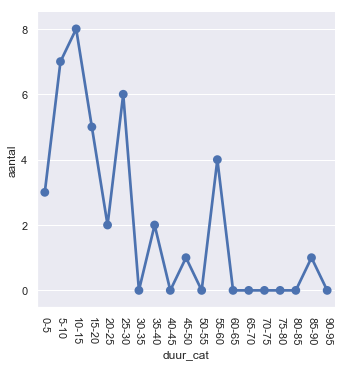

In [396]:
sns.catplot(x="duur_cat", y="aantal", kind="point", data=slaap_count, markers='o')
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

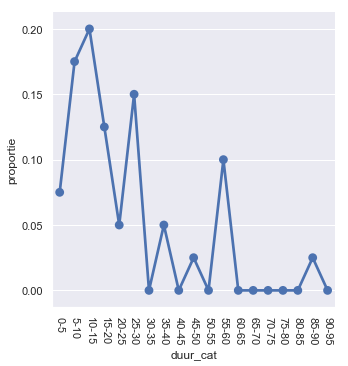

In [397]:
sns.catplot(x="duur_cat", y="proportie", kind = "point", data=slaap_count, markers='o')
plt.xticks(rotation=-90)

##### barplot (aantal & proportie)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

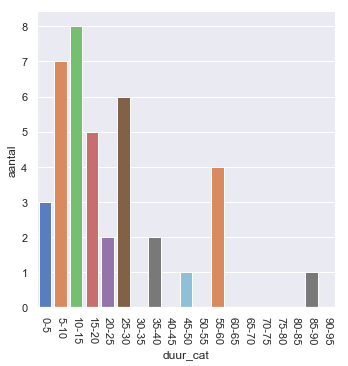

In [398]:
sns.catplot( x="duur_cat", y="aantal",  data=slaap_count, kind="bar", palette="muted")
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

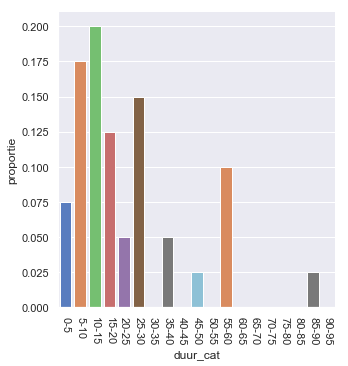

In [399]:
sns.catplot( x="duur_cat", y="proportie",  data=slaap_count, kind="bar", palette="muted")
plt.xticks(rotation=-90)

## Slaapkwaliteit 

### Algemeen/continu

Hoe hoger de opgetelde waarde van de sleep quality vragenlijst, hoe slechter de gerapporteerde slaapkwaliteit. 

In [40]:
#specifieke dataframe aanmaken. 
SK = df[["sleepquality"]]

##### continue verdeling 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


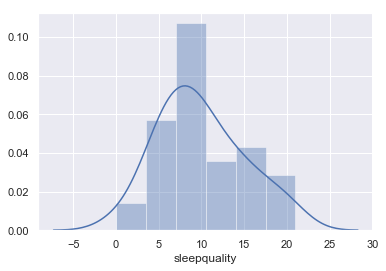

In [41]:
sns.distplot(SK["sleepquality"])

##### regressieplots

In [105]:
#importeren van een library
from scipy.stats import linregress

In [107]:
#specifieke dataframe met de andere variabelen waarmee je wil regresseren. 
SK_reg = df[["sleepquality", "MIN_VR_SLAAP", "TOT_SLAAP", "SK_[0-3]"]]

###### (1) gerapporteerde slaapkwaliteit & gerapporteerd aantal minuten gebruik tot voor slaap. 

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


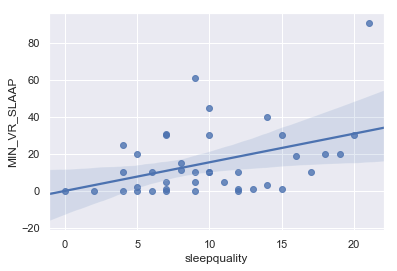

In [108]:
sns.regplot(x = "sleepquality", y="MIN_VR_SLAAP", data = SK_reg)

<b>Interpretatie:</b> ziet er een positief verband uit. <br>
<i>dwz:</i> hoe "slechter" de gerapporteerde slaapkwaliteit (= hogere waarde), hoe vroeger men aangeeft de smartphone aan de kant te leggen. <br>
<i>dwz:</i> hoe "beter" de gerapporteerde slaapkwaliteit (=lagere waarde), hoe dichter bij hun slaap ze aangeven hun smartphone aan de kant te leggen. <br>
contra-intuïtief? Door outliers? 

significantie? 

In [110]:
linregress(SK_reg["sleepquality"], SK_reg["MIN_VR_SLAAP"])

LinregressResult(slope=1.5532285332189444, intercept=-0.11579319219802287, rvalue=0.4110259246995434, pvalue=0.008421164745909539, stderr=0.5588431509999566)

significant positief verband. 

###### (2) sleepquality & TOT_slaap  (kan indicatie zijn van slaapkwaliteit)

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


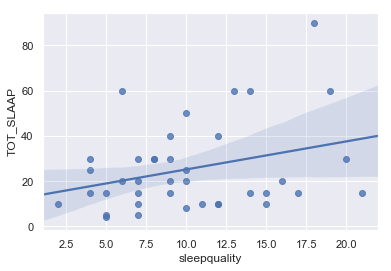

In [408]:
sns.regplot(x = "sleepquality", y="TOT_SLAAP", data = SK_reg)

<b>Interpretatie:</b> ziet er een positief verband uit. <br>
<i>dwz:</i> hoe "slechter" de gerapporteerde slaapkwaliteit (= hogere waarde), hoe langer ze rapporteren dat het duurt tot ze in slaap vallen. <br>
Lijkt logisch. <br>

significantie?

In [111]:
linregress(SK_reg["sleepquality"], SK_reg["TOT_SLAAP"])

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)

###### (3) sleepquality & min_vr_slaap (gebruik) afh van de score die de participanten gegeven hebben op SK_[0-3]

SK = 0: "zeer goed", SK = 3: "zeer slecht"

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


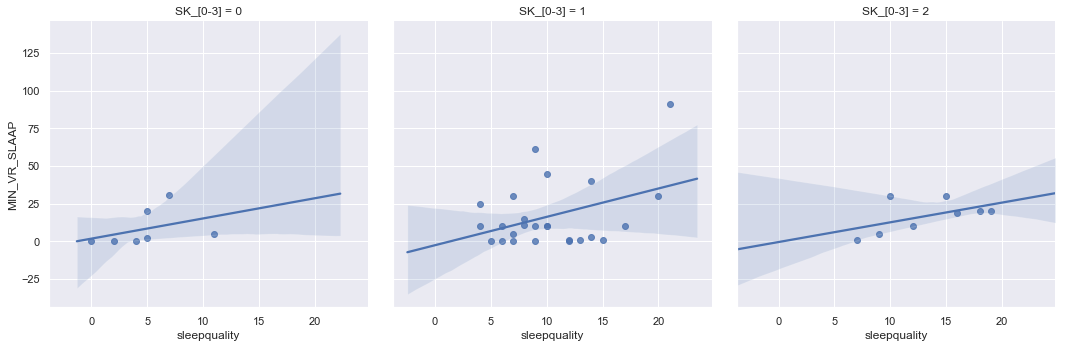

In [412]:
sns.lmplot(x = "sleepquality", y="MIN_VR_SLAAP", col="SK_[0-3]", data = SK_reg)

<b>Interpretatie:</b> ziet er drie keer een positief verband uit. <br>
Drie plots afhankelijk van hoe ze de voorbije maand in het algemeen hun slaapkwaliteit zagen.
<i>dwz:</i> hoe "slechter" de gerapporteerde slaapkwaliteit (= hogere waarde), hoe vroeger voor het slapen ze de smartphone aan de kant leggen. <br>


###### (4) sleepquality & TOT_slaap afh van de score die de participanten gegeven hebben op SK_[0-3]

C:\Users\beheerder\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


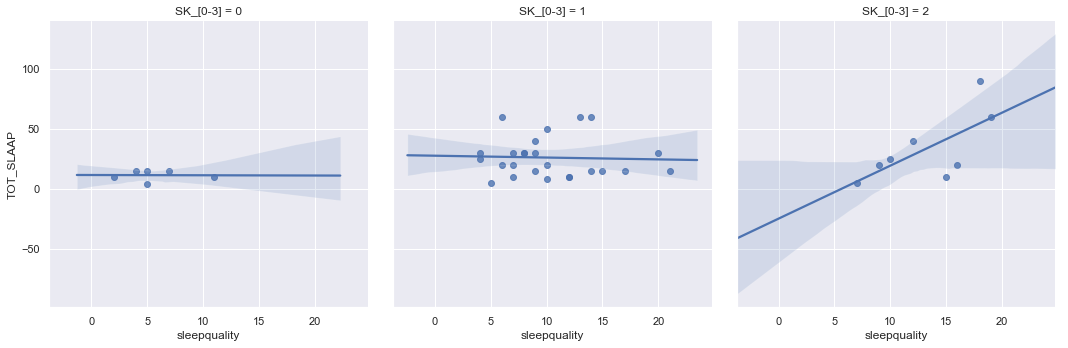

In [414]:
sns.lmplot(x = "sleepquality", y="TOT_SLAAP", col="SK_[0-3]", data = SK_reg)

<b>Interpretatie:</b> vooral in de derde situatie een positief verband. <br>
Dit is de situatie waarbij ze aangaven dat ze hun slaapkwaliteit de voorbije maand zien als "redelijk slecht"
<i>dwz:</i> hoe "slechter" de gerapporteerde slaapkwaliteit (= hogere waarde) via de vragenlijst, hoe meer minuten ze aangeven dat het duurt voordat ze in slaap raken. <br>

##### heatmap

###### Stap 1: dataset aanmaken die alle vragen van de vragenlijst bevatten en alle antwoorden van de participanten. 

In [416]:
SQ = df[["ppn", "1_1 [0 - 3]", "1_2 [0 - 3]", "1_3 [0 - 3]", "1_4 [0-3]", "1_5[0-3]", "1_6[0-3]", "1_7[0-3]", "1_8 [0-3]",
         "SK_[0-3]", "enth [0-3]", "SM [0-3]", "WB [0-3]"]]

###### Stap 2: de dataset in long format plaatsen. 

In [420]:
SQ_long = pd.melt(SQ, id_vars = "ppn", value_vars = ["1_1 [0 - 3]", "1_2 [0 - 3]", "1_3 [0 - 3]", "1_4 [0-3]", "1_5[0-3]", "1_6[0-3]", "1_7[0-3]", "1_8 [0-3]",
         "SK_[0-3]", "enth [0-3]", "SM [0-3]", "WB [0-3]"])
SQ_long

,ppn,variable,value
0,1,1_1 [0 - 3],3
1,2,1_1 [0 - 3],1
2,3,1_1 [0 - 3],1
3,4,1_1 [0 - 3],1
4,5,1_1 [0 - 3],3
5,6,1_1 [0 - 3],3
6,8,1_1 [0 - 3],1
7,9,1_1 [0 - 3],1
8,10,1_1 [0 - 3],3
9,11,1_1 [0 - 3],0


###### Stap 3: bepalen hoeveel keer elk antwoord gegeven is op elke vraag. 

In [423]:
SQ_long_count = SQ_long.groupby(["variable", "value"]).count()

###### Stap 4: proportie berekenen. 

In [427]:
SQ_long_count["proportie"] = SQ_long_count["ppn"]/40
SQ_long_count

ppn  proportie
variable    value                
1_1 [0 - 3] 0        5      0.125
            1       17      0.425
            2       10      0.250
            3        8      0.200
1_2 [0 - 3] 0       10      0.250
            1       17      0.425
            2        6      0.150
            3        7      0.175
1_3 [0 - 3] 0       20      0.500
            1        9      0.225
            2        5      0.125
            3        6      0.150
1_4 [0-3]   0       30      0.750
            1        6      0.150
            2        3      0.075
            3        1      0.025
1_5[0-3]    0       21      0.525
            1       12      0.300
            2        7      0.175
1_6[0-3]    0       19      0.475
            1       14      0.350
            2        5      0.125
            3        2      0.050
1_7[0-3]    0       23      0.575
            1       10      0.250
            2        6      0.150
            3        1      0.025
1_8 [0-3]   0       28      0.700
            1        8      0.200
            2        4      0.100
SK_[0-3]    0        7      0.175
            1       25      0.625
            2        8      0.200
SM [0-3]    0       36      0.900
            1        3      0.075
            3        1      0.025
WB [0-3]    0       24      0.600
            1       10      0.250
            2        4      0.100
            3        2      0.050
enth [0-3]  0        2      0.050
            1       15      0.375
            2       18      0.450
            3        5      0.125

###### Stap 5: ontbrekende waarden en kolommen aanvullen via Excel. 

In [428]:
SQ_long_count.to_excel("SQ_long_count.xlsx")

In [429]:
heat_SQ = pd.read_excel("C:/Users/beheerder/SQ_long_count.xlsx")
heat_SQ

,variable,value,aantal,proportie,antwoord,vraag
0,1_1 [0 - 3],0,5,0.125,0,1_1 [0 - 3]
1,NaN,1,17,0.425,1,1_1 [0 - 3]
2,NaN,2,10,0.250,2,1_1 [0 - 3]
3,NaN,3,8,0.200,3,1_1 [0 - 3]
4,1_2 [0 - 3],0,10,0.250,0,1_2 [0 - 3]
5,NaN,1,17,0.425,1,1_2 [0 - 3]
6,NaN,2,6,0.150,2,1_2 [0 - 3]
7,NaN,3,7,0.175,3,1_2 [0 - 3]
8,1_3 [0 - 3],0,20,0.500,0,1_3 [0 - 3]
9,NaN,1,9,0.225,1,1_3 [0 - 3]


###### Stap 6: heatmap aanmaken 

In [430]:
heat_SQ= heat_SQ.pivot("vraag","antwoord", "proportie")
heat_SQ

antwoord,0,1,2,3
vraag,,,,
1_1 [0 - 3],0.125,0.425,0.250,0.200
1_2 [0 - 3],0.250,0.425,0.150,0.175
1_3 [0 - 3],0.500,0.225,0.125,0.150
1_4 [0 - 3],0.750,0.150,0.075,0.025
1_5 [0 - 3],0.525,0.300,0.175,0.000
1_6 [0 - 3],0.475,0.350,0.125,0.050
1_7 [0 - 3],0.575,0.250,0.150,0.025
1_8 [0 - 3],0.700,0.200,0.100,0.000
SK_[0 - 3],0.175,0.625,0.200,0.000


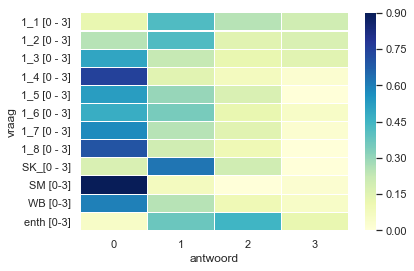

In [431]:
sns.heatmap(heat_SQ, cmap="YlGnBu", linewidths=.1)

<b> Interpretatie: </b> 
    in het algemeen wegen de antwoorden die wijzen op weinig slaapproblemen de voorbije maand door. <br>
    Slaapkwaliteit wordt in het algemeen gezien als "redelijk goed deze maand". <br>
    Slaapmiddelen werden duidelijk door de meesten "niet gebruikt gedurende de voorbije maand". <br>
    De meeste mensen geven aan dat ze voorbije maand geen problemen gehad hebben om wakker te blijven de voorbije maand. <br>
    Het blijkt echter wel wat frequenter voor te komen dat mensen problemen hadden om voldoende enthousiast te blijven om dingen gedaan te krijgen; dit wordt door de meesten gezien als een heel klein - een beetje een probleem. 